# 1 Linear Regression

## 1.1 Cost function

### Task
Knowing $x$ – the population of the city, you should predict $y$ - the income of the transport company.

(Data from the course "Machine Learning", Andrew Ng, Coursera).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from IPython.display import display, Math, Latex

### Data

In [2]:
import pandas as pd

data = pd.read_csv("data1_train.csv", names=["x", "y"])

x = data["x"].to_numpy()
y = data["y"].to_numpy()

print(data)

          x         y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
75   6.5479   0.29678
76   7.5386   3.88450
77   5.0365   5.70140
78  10.2740   6.75260
79   5.1077   2.05760

[80 rows x 2 columns]


In [3]:
# data visualization
def regdots(x, y):
    fig = plt.figure(figsize=(10, 6))
    plt.scatter(data['x'], data['y'], color='red', label='Data')
    plt.xlabel('city population')
    plt.ylabel('income')
    plt.title('Data')
    plt.legend()
    return fig

def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    try:
        fig.legend(handles, labels, fontsize="15", loc="lower right")
    except AttributeError:
        pass

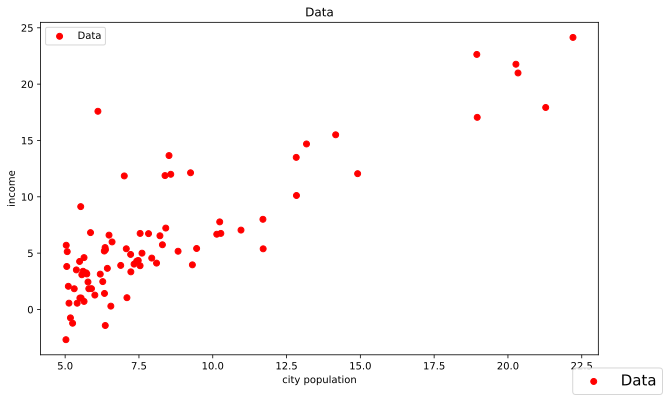

In [4]:
fig = regdots(x, y)
legend(fig)

### Hypothesis and model parameters
How to predict $y$ from a given $x$? In order to answer this question, we will try to find a function $h(x)$ that will best represent the relationship between $x$ and $y$, i.e. $y \sim h(x)$.

Let's start with the simplest case where $h(x)$ is just a linear function. The general formula of a linear function is

$$ h(x) = a \, x + b $$

However, remember that the coefficients $a$ and $b$ are not currently given in advance – our task will be to find their values so that $h (x)$ is "as close as possible" to $y$ (what this formulation actually means, I will explain later).

The desired function $h$ will be called **hypothesis function**, and its coefficients - **model parameters**.

In machine learning theory, the parameters of the model are usually denoted by the Greek letter $\theta$ with the corresponding indices, therefore the above formula describing the linear function of the hypothesis will be written as
$$ h(x) = \theta_0 + \theta_1 x $$

**The parameters of the model** form a vector, which we denote simply by $\theta$:

$$ \theta = \left[\begin{array}{c}\theta_0\\ \theta_1\end{array}\right] $$

To emphasize the fact that the hypothesis function depends on the parameters of the model, we will write $h_\theta$ instead of $h$:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x $$


In [5]:
# h function in code

def h(theta, x):
    return theta[0] + theta[1] * x

In [6]:
# Function to plot a line function based on thetas

def regline(fig, function, theta, x):
    ax = fig.axes[0]
    x0, x1 = min(x), max(x)
    X = [x0, x1]
    y0, y1 = function(theta, x0), function(theta, x1)
    Y = [y0, y1]
    plt.title('Data with line')
    ax.plot(
        X,
        Y,
        linewidth="2",
        label=(
            r"$y={theta0}{op}{theta1}x$".format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op="+" if theta[1] >= 0 else "-",
            )
        ),
    )

In [7]:
# Interactive siders for thetas

sliderTheta01 = ipywidgets.FloatSlider(
    min=-10, max=10, step=0.1, value=0, description=r"$\theta_0$", width=300
)
sliderTheta11 = ipywidgets.FloatSlider(
    min=-5, max=5, step=0.1, value=0, description=r"$\theta_1$", width=300
)

In [8]:
# Function that plots data with line

def slide1(theta0, theta1):
    fig = regdots(x, y)
    regline(fig, h, [theta0, theta1], x)
    legend(fig)

In [9]:
# Calling interaction with slide1 function

ipywidgets.interact(slide1, theta0=sliderTheta01, theta1=sliderTheta11)

interactive(children=(FloatSlider(value=0.0, description='$\\theta_0$', max=10.0, min=-10.0), FloatSlider(valu…

<function __main__.slide1(theta0, theta1)>

### Loss function

We define the cost function in such a way that it reflects the difference between the predictions of the model and the observations.

One possibility is to define the cost function as the value of the **mean-square error** (least-square method, *mean-square error, MSE*).

We will define the cost function as * half* of the mean square error in order to facilitate later calculations (calculate the derivative of the cost function later in the lecture). We can do this because $\frac{1}{2}$ is a constant, and multiplying by a constant does not affect the variability of the function.

$$ J(\theta) \, = \, \frac{1}{2m} \sum_{i = 1}^{m} \left( h_{\theta} \left( x^{(i)} \right) - y^{(i)} \right) ^2 $$

where $m$ is the number of all examples (observations), that is, the size of the data set of learners.

In [10]:
def J(h, theta, x, y):
    """Loss function"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i]) ** 2 for i in range(m))


In the above formula, we sum the squares of the differences between the predictions of the model ($h_\theta \left (x^{(i)} \right)$) and the observations ($y^{(i)}$) after all the examples $i$.

Now our task boils down to the fact that we will look for such parameters $\theta = \left[\begin{array}{c}\theta_0\\ \theta_1\end{array}\right]$ that minimize the cost fuction $J (\theta)$:

$$ \hat\theta = \mathop{\arg\min}_{\theta} J(\theta) $$

$$ \theta \in \mathbb{R}^2, \quad J \colon \mathbb{R}^2 \to \mathbb{R} $$

Note that the domain of the cost function is the set of all possible parameter values $\theta$.

$$ J(\theta_0, \theta_1) \, = \, \frac{1}{2m} \sum_{i = 1}^{m} \left( \theta_0 + \theta_1 x^{(i)} - y^{(i)} \right) ^2 $$

In [11]:
def regline2(fig, fun, theta, xx, yy):
    ax = fig.axes[0]
    x0, x1 = min(xx), max(xx)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    cost = J(fun, theta, xx, yy)
    plt.title('Data with line and loss function')
    ax.plot(
        X,
        Y,
        linewidth="2",
        label=(
            r"$y={theta0}{op}{theta1}x, \; J(\theta)={cost:.3}$".format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op="+" if theta[1] >= 0 else "-",
                cost=cost,
            )
        ),
    )


sliderTheta02 = ipywidgets.FloatSlider(
    min=-10, max=10, step=0.1, value=0, description=r"$\theta_0$", width=300
)
sliderTheta12 = ipywidgets.FloatSlider(
    min=-5, max=5, step=0.1, value=0, description=r"$\theta_1$", width=300
)


def slide2(theta0, theta1):
    fig = regdots(x, y)
    regline2(fig, h, [theta0, theta1], x, y)
    legend(fig)

In [12]:
ipywidgets.interact(slide2, theta0=sliderTheta02, theta1=sliderTheta12)

interactive(children=(FloatSlider(value=0.0, description='$\\theta_0$', max=10.0, min=-10.0), FloatSlider(valu…

<function __main__.slide2(theta0, theta1)>

In [13]:
# Graph of cost function for fixed theta_1=1.0


def costfun(fun, x, y):
    return lambda theta: J(fun, theta, x, y)


def costplot(hypothesis, x, y, theta1=1.0):
    fig = plt.figure(figsize=(16 * 0.6, 9 * 0.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel(r"$\theta_0$")
    ax.set_ylabel(r"$J(\theta)$")
    j = costfun(hypothesis, x, y)
    fun = lambda theta0: j([theta0, theta1])
    X = np.arange(-10, 10, 0.1)
    Y = [fun(x) for x in X]
    ax.plot(
        X, Y, linewidth="2", label=(r"$J(\theta_0, {theta1})$".format(theta1=theta1))
    )
    return fig


def slide3(theta1):
    fig = costplot(h, x, y, theta1)
    legend(fig)


sliderTheta13 = ipywidgets.FloatSlider(
    min=-5, max=5, step=0.1, value=1.0, description=r"$\theta_1$", width=300
)

In [14]:
ipywidgets.interact(slide3, theta1=sliderTheta13)

interactive(children=(FloatSlider(value=1.0, description='$\\theta_1$', max=5.0, min=-5.0), Output()), _dom_cl…

<function __main__.slide3(theta1)>

In [15]:
# Graph of cost function with respect to theta_0 and theta_1

from mpl_toolkits.mplot3d import Axes3D
import pylab

%matplotlib inline

def costplot3d(hypothesis, x, y):
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel(r'$J(\theta)$')
    
    j = lambda theta0, theta1: costfun(hypothesis, x, y)([theta0, theta1])
    X = np.arange(-10, 10.1, 0.1)
    Y = np.arange(-1, 4.1, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.array([[J(hypothesis, [theta0, theta1], x, y) 
                    for theta0, theta1 in zip(xRow, yRow)] 
                   for xRow, yRow in zip(X, Y)])
    
    ax.plot_surface(X, Y, Z, rstride=2, cstride=8, linewidth=0.5,
                    alpha=0.5, cmap='jet', zorder=0,
                    label=r"$J(\theta)$")
    ax.view_init(elev=20., azim=-150)

    ax.set_xlim3d(-10, 10);
    ax.set_ylim3d(-1, 4);
    ax.set_zlim3d(-100, 800);

    N = range(0, 800, 20)
    plt.contour(X, Y, Z, N, zdir='z', offset=-100, cmap='coolwarm', alpha=1)

    ax.margins(0,0,0)
    fig.tight_layout()

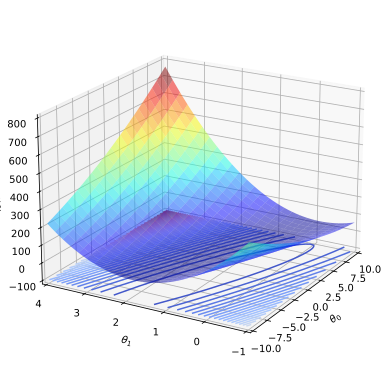

In [16]:
costplot3d(h, x, y)

### Simple gradient method
At each step we will update the parameters $\theta_j$:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J (\theta) $$

The factor $\alpha$ is called **step length** or **learning rate**.

$$ \begin{array}{rcl}
\dfrac{\partial}{\partial \theta_j} J(\theta)
 & = & \dfrac{\partial}{\partial \theta_j} \dfrac{1}{2m} \displaystyle\sum_{i = 1}^{m} \left( h_{\theta} \left( x^{(i)} \right) - y^{(i)} \right) ^2 \\
 & = & 2 \cdot \dfrac{1}{2m} \displaystyle\sum_{i=1}^m \left( \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) \cdot \dfrac{\partial}{\partial\theta_j} \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) \right) \\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) \cdot \dfrac{\partial}{\partial\theta_j} \left( \displaystyle\sum_{k=0}^n \theta_k x_k^{(i)} - y^{(i)} \right) \right) \\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) -y^{(i)} \right) x_j^{(i)} \\
\end{array} $$

For linear regression of one variable:

$$ h_\theta(x) = \theta_0 + \theta_1x $$

we will update every step:

$$
\begin{array}{rcl}
\theta_0 & := & \theta_0 - \alpha \, \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) \\ 
\theta_1 & := & \theta_1 - \alpha \, \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) x^{(i)}\\ 
\end{array}
$$

###### Look out!
 * In each step we update *simultaneously* $\theta_0$ and $\theta_1$

* Follow the next steps until we have a convergence

### Simple gradient method - implementation

In [17]:
# Displaying matrices in LaTeX

def LatexMatrix(matrix):
    ltx = r"\left[\begin{array}"
    m, n = matrix.shape
    ltx += "{" + ("r" * n) + "}"
    for i in range(m):
        ltx += r" & ".join([("%.4f" % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r"\end{array}\right]"
    return ltx


In [18]:
def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    history = [
        [current_cost, theta]
    ]  # painting down the cost and parameter values to make a graph
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1]
            - alpha / float(m) * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m)),
        ]
        theta = new_theta  # simultaneous update - we use a temporary variable
        try:
            prev_cost = current_cost
            current_cost = cost_fun(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        history.append([current_cost, theta])
    return theta, history


In [19]:
best_theta, history = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.01, eps=0.0001)

display(
    Math(
        r"\large\textrm{Result:}\quad \theta = "
        + LatexMatrix(np.matrix(best_theta).reshape(2, 1))
        + (r" \quad J(\theta) = %.4f" % history[-1][0])
        + r" \quad \textrm{after %d iterations}" % len(history)
    )
)


<IPython.core.display.Math object>

### Learning rate factor $\alpha$ (step length)

The rate of convergence of the simple gradient method can be adjusted using the parameter $\alpha$, remembering that:

* If the step length is too small, the algorithm may run too slowly.

* If the step length is too long, the algorithm may not converge.

## 2.3. Prediction of results

We built a model that lets us know what the relationship is between the income of a transportation company ($y$) and the population of a city ($x$).

Let us now return to the question posed at the beginning of the lecture: how to predict the income of a transport company in a city of a given size?

The answer is simply to use the function $h$ with the parameters $\theta$specified in the previous step.

For example, if a city has a population of $536,000$, then $x = $ 53.6 (because the Teaching data was expressed in tens of thousands of residents, and $536,000 = 53.6 \cdot 10\,000$) and we can use the parameters $\theta$ to perform the following calculations:
$$ \hat{y} \, = \, h_\theta(x) \, = \, \theta_0 + \theta_1 \, x \, = \, -3.0174 + 1.1330 \cdot 53.6 \, = \, 57.7114 $$

Using previously defined functions:

In [20]:
example_x = 53.6
predicted_y = h(best_theta, example_x)
print(
    predicted_y
)  ## this is the projected revenue of this transportation company in a city of 536,000


57.711124440555636


## 2.4. Model evaluation

How to assess the quality of our model?

 * You need to check how the predictions of the model agree with expectations!

Can we use the data we used to teach the model for this purpose?

**NO!**

* The essence of machine learning is to build models / algorithms that make good predictions for **unknown** data – data that the algorithm has not yet had contact with! It's not an art to predict things you already know.

* Therefore, testing / evaluating the model **on the learning set** misses the point and is useless.

* Use a separate data set to evaluate the model.

**Teaching data and test data should always be separate sets!**

In the file * 5.* you will learn how to divide your data into a learning set and a test set.

Here, for now, we will use a specially prepared test set for evaluation.

As an evaluation metric, we will use the well-known mean square error (MSE):

In [21]:
def mse(expected, predicted):
    """Błąd średniokwadratowy"""
    m = len(expected)
    if len(predicted) != m:
        raise Exception("Wektory mają różne długości!")
    return 1.0 / (2 * m) * sum((expected[i] - predicted[i]) ** 2 for i in range(m))


In [22]:
# Loading test data from a file using numpy

test_data = np.loadtxt("data1_test.csv", delimiter=",")
x_test = test_data[:, 0]
y_test = test_data[:, 1]

# Calculation of model predictions
y_pred = h(best_theta, x_test)

# Calculation of MSE on the test set (the smaller the MSE, the better!)
evaluation_result = mse(y_test, y_pred)

print(evaluation_result)


3.713536032914909


The resulting value tells us how good the model we created is.

For the MSE metric, the lower the value, the better.

For example, we can compare different models.